# Clustering Notebook - Attacking the US Opioid Epidemic
## Joseph Blankenship and Jacob Mitchell
In this Notebook, we take our gathered data and put it into clusters to see if we can find any patterns or relationships in our data. We will do this for each year of gathered data (2017, 2018, and 2019) and see if the relationships strongly hold for each year.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn import mixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model # Scikit-Learn - https://scikit-learn.org/ 
from pandas.plotting import andrews_curves

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
stats2018 = pd.read_csv("totals2018")
state_list = stats2018['State Name']
#I just input this here to make a list of state names for later use.

# Clustering for 2017 Data
## Inintially, we will be making clusters of a lot of different factors that may have an impact on opioid misuse. 
We will be dropping and storing the number of deaths and the death rate to see if the clusters formed will have a direct impact on the number of deaths or the death rate. 

In [3]:
stats2017 = pd.read_csv("totals2017.csv")
stats2017
numdeaths2017 = stats2017['2017_num_deaths']
normDR2017 = stats2017['Normalized_Death_Rate']

In [4]:
numdeaths2017 = numdeaths2017.replace(',','', regex=True)

In [5]:
#Dropping these columns since they're non numerical
stats2017 = stats2017.drop(columns=['State Name', 'Unnamed: 0', 'range_category', '2017_num_deaths', 'Normalized_Death_Rate'])

In [247]:
stats2017 = stats2017.drop(columns=['Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2017_age_adjusted_rate'])

In [248]:
stats2017.columns

Index(['Year', 'Normalized_Long-Acting_Rate', 'Normalized_Tot_Opioid_Clms',
       'SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [249]:
stats2017 = stats2017.replace(',','', regex=True)

In [265]:
kmeans = KMeans(n_clusters=3).fit(stats2017.values)
print(kmeans, "\n")

KMeans(n_clusters=3) 



In [266]:
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([46,  1,  3], dtype=int64))


In [267]:
#print(kmeans.cluster_centers_)

In [268]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
#print(kmeans_3)

In [269]:
pca = PCA(n_components=2).fit(stats2017)

# Perform the transform
pca_trans = pca.transform(stats2017)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
26,0,-24896.678878,-604.624467
48,0,7983.751203,-2364.864314
28,0,-57790.354200,-890.824821
2,0,-44573.234677,-786.755095
17,0,-33243.445841,1343.542399


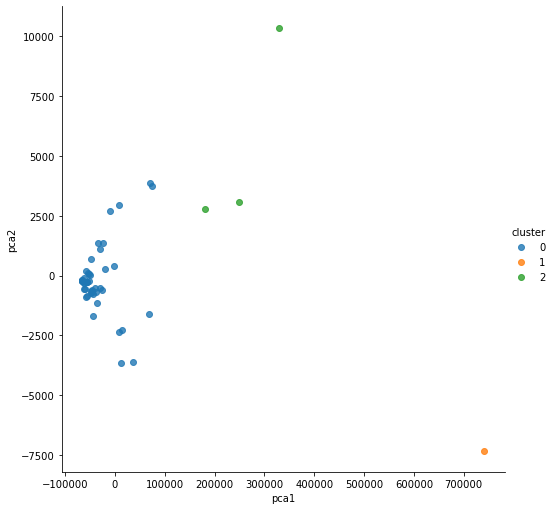

In [270]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 252337304489.10248
Obj. Func: 73648343877.30511
Obj. Func: 26290172686.096226
Obj. Func: 17426389184.62444
Obj. Func: 9056646199.505833
Obj. Func: 5445101628.884965
Obj. Func: 3040336805.6858478
Obj. Func: 1810327052.5581162
Obj. Func: 1115358937.6101866


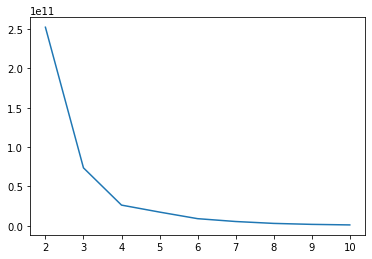

In [271]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(stats2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

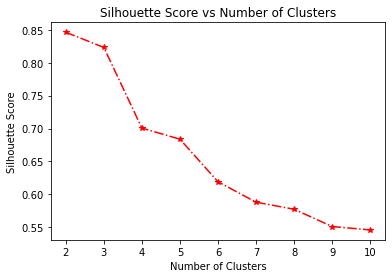

In [272]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(stats2017.values) for k in k_range]
sscores = [silhouette_score(stats2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [273]:
clusterResults2017 = pd.concat([kmeans_3, stats2017], axis=1, join='outer')
clusterResults2017['State'] = state_list
clusterResults2017['Num_Deaths'] = numdeaths2017
clusterResults2017['Norm Death Rate'] = normDR2017
#clusterResults2017


In [274]:
clusterResults2017['Num_Deaths'] = clusterResults2017['Num_Deaths'].astype(float)

In [275]:
clusterResults2017.groupby(["cluster", "State", "Norm Death Rate"]).mean()

pca1          pca2  Year  \
cluster State          Norm Death Rate                                      
0       Alabama        17.130011        -24630.499741   1361.079109  2017   
        Alaska         19.872921        -56103.937058   -851.257644  2017   
        Arizona        21.748982        -44573.234677   -786.755095  2017   
        Arkansas       14.860004        -29069.871494   1129.245844  2017   
        California     12.368358        -49456.486532     14.463699  2017   
        Colorado       18.086614        -46553.526035   -616.570639  2017   
        Connecticut    30.000305        -48717.297134   -714.105961  2017   
        Delaware       35.325238        -43241.658805  -1709.568985  2017   
        Georgia        7.331751         -53528.255933    125.137076  2017   
        Hawaii         1.949986         -65372.103363   -200.288710  2017   
        Idaho          16.568461        -35603.656431  -1135.966445  2017   
        Illinois       161.726480        70123.286158   3866.961216  2017   
        Indiana        14.492722        -51128.512578     47.351560  2017   
        Iowa           5.121598         -55893.870058   -252.470099  2017   
        Kansas         10.599863        -40594.558902   -535.819509  2017   
        Kentucky       53.838151        -10054.496152   2695.007626  2017   
        Louisiana      24.886193        -33243.445841   1343.542399  2017   
        Maine          9.078141         -59231.463243   -572.605965  2017   
        Maryland       168.363539        12590.718784  -3662.119994  2017   
        Massachusetts  35.990164        -45855.301094   -678.084859  2017   
        Michigan       39.272345        -20067.369118    278.104654  2017   
        Minnesota      7.349761         -56751.908416   -250.079548  2017   
        Mississippi    6.359780         -48233.321065    673.621729  2017   
        Missouri       45.741858          -747.458169    391.312838  2017   
        Montana        1.948689         -62638.963029   -290.278373  2017   
        Nebraska       14.442052        -24896.678878   -604.624467  2017   
        Nevada         35.282813        -30221.051855   -536.371509  2017   
        New Hampshire  15.724409        -57790.354200   -890.824821  2017   
        New Jersey     199.067755        37149.544293  -3618.524202  2017   
        New Mexico     5.548350         -62060.014167   -101.310961  2017   
        New York       187.447652        67768.998651  -1587.244992  2017   
        North Carolina 12.322883        -51148.922374   -212.010908  2017   
        North Dakota   0.662237         -65420.391199   -224.323683  2017   
        Oklahoma       6.646855         -55899.990943   -288.161106  2017   
        Oregon         13.481491        -38525.153507   -676.501289  2017   
        Pennsylvania   130.031072        13463.503526  -2280.161249  2017   
        Rhode Island   2.502416         -65262.531692   -166.841376  2017   
        South Carolina 95.484113         74640.833723   3761.105086  2017   
        South Dakota   1.453816         -62763.876405   -321.056739  2017   
        Texas          44.553429          8662.635935   2944.326422  2017   
        Utah           2.297203         -64848.998526   -222.108409  2017   
        Vermont        4.321128         -62511.794376   -547.432565  2017   
        Washington     13.812111        -48307.602453   -631.546139  2017   
        West Virginia  13.120740        -58422.570966    198.839158  2017   
        Wisconsin      64.776963          7983.751203  -2364.864314  2017   
        Wyoming        1.191672         -65076.659033   -216.099007  2017   
1       Florida        732.185360       741474.532147  -7319.175811  2017   
2       Ohio           677.005651       330241.080367  10371.338588  2017   
        Tennessee      203.467191       249405.777750   3084.316831  2017   
        Virginia       241.373345       180943.122907   2779.401538  2017   

                                        Norm

In [276]:
clusterResults2017.groupby(["cluster"])['Norm Death Rate'].std()

cluster
0     51.322559
1           NaN
2    263.138447
Name: Norm Death Rate, dtype: float64

In [277]:
clusterResults2017.groupby(["cluster", "State", "Num_Deaths"]).mean()

pca1          pca2  Year  \
cluster State          Num_Deaths                                      
0       Alabama        835.0       -24630.499741   1361.079109  2017   
        Alaska         147.0       -56103.937058   -851.257644  2017   
        Arizona        1532.0      -44573.234677   -786.755095  2017   
        Arkansas       446.0       -29069.871494   1129.245844  2017   
        California     4868.0      -49456.486532     14.463699  2017   
        Colorado       1015.0      -46553.526035   -616.570639  2017   
        Connecticut    1072.0      -48717.297134   -714.105961  2017   
        Delaware       338.0       -43241.658805  -1709.568985  2017   
        Georgia        1537.0      -53528.255933    125.137076  2017   
        Hawaii         203.0       -65372.103363   -200.288710  2017   
        Idaho          236.0       -35603.656431  -1135.966445  2017   
        Illinois       2778.0       70123.286158   3866.961216  2017   
        Indiana        1852.0      -51128.512578     47.351560  2017   
        Iowa           341.0       -55893.870058   -252.470099  2017   
        Kansas         333.0       -40594.558902   -535.819509  2017   
        Kentucky       1566.0      -10054.496152   2695.007626  2017   
        Louisiana      1108.0      -33243.445841   1343.542399  2017   
        Maine          424.0       -59231.463243   -572.605965  2017   
        Maryland       2247.0       12590.718784  -3662.119994  2017   
        Massachusetts  2168.0      -45855.301094   -678.084859  2017   
        Michigan       2694.0      -20067.369118    278.104654  2017   
        Minnesota      733.0       -56751.908416   -250.079548  2017   
        Mississippi    354.0       -48233.321065    673.621729  2017   
        Missouri       1367.0        -747.458169    391.312838  2017   
        Montana        119.0       -62638.963029   -290.278373  2017   
        Nebraska       152.0       -24896.678878   -604.624467  2017   
        Nevada         676.0       -30221.051855   -536.371509  2017   
        New Hampshire  467.0       -57790.354200   -890.824821  2017   
        New Jersey     2685.0       37149.544293  -3618.524202  2017   
        New Mexico     493.0       -62060.014167   -101.310961  2017   
        New York       3921.0       67768.998651  -1587.244992  2017   
        North Carolina 2414.0      -51148.922374   -212.010908  2017   
        North Dakota   68.0        -65420.391199   -224.323683  2017   
        Oklahoma       775.0       -55899.990943   -288.161106  2017   
        Oregon         530.0       -38525.153507   -676.501289  2017   
        Pennsylvania   5388.0       13463.503526  -2280.161249  2017   
        Rhode Island   320.0       -65262.531692   -166.841376  2017   
        South Carolina 1008.0       74640.833723   3761.105086  2017   
        South Dakota   73.0        -62763.876405   -321.056739  2017   
        Texas          2989.0        8662.635935   2944.326422  2017   
        Utah           650.0       -64848.998526   -222.108409  2017   
        Vermont        134.0       -62511.794376   -547.432565  2017   
        Washington     1169.0      -48307.602453   -631.546139  2017   
        West Virginia  974.0       -58422.570966    198.839158  2017   
        Wisconsin      1177.0        7983.751203  -2364.864314  2017   
        Wyoming        69.0        -65076.659033   -216.099007  2017   
1       Florida        5088.0      741474.532147  -7319.175811  2017   
2       Ohio           5111.0      330241.080367  10371.338588  2017   
        Tennessee      1776.0      249405.777750   3084.316831  2017   
        Virginia       1507.0      180943.122907   2779.401538  2017   

                                   Normalized_Long-Acting_Rate  \
cluster State          Num_Deaths                                
0       Alabama        835.0                       3927.839776   
        Alaska         147.0                       2049.073949   
        Arizona        1532.0      

In [278]:
clusterResults2017.groupby(["cluster"]).Num_Deaths.std()

cluster
0    1253.549421
1            NaN
2    2007.627206
Name: Num_Deaths, dtype: float64

<AxesSubplot:>

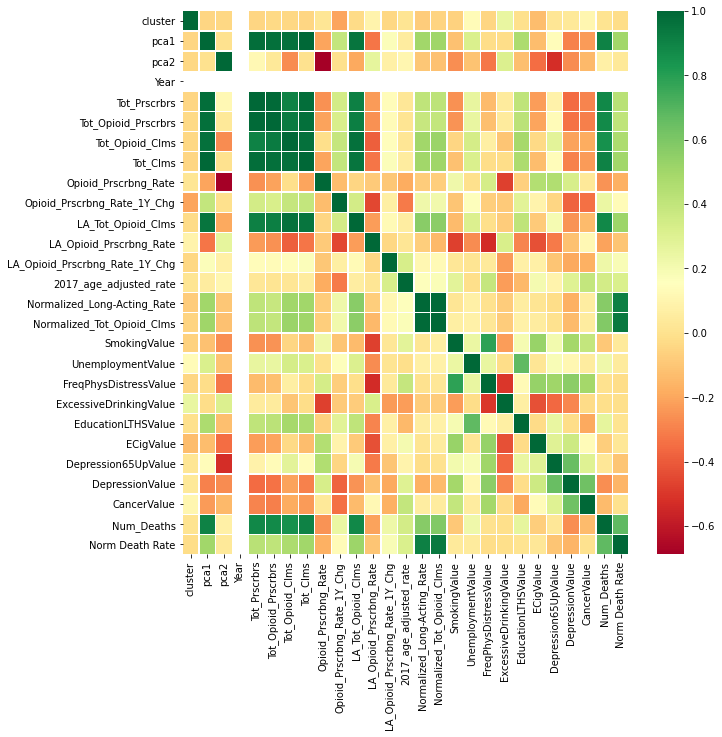

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(clusterResults2017.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False, ax=ax)

## Clustering a smaller amount of 2017 data

In [45]:
small2017 = pd.read_csv("normState_2017.csv")
small2017 = small2017.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
small2017 = small2017.replace(',','', regex=True)
small2017

,Tot_Prscrbrs,Tot_Opioid_Prscrbrs,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_1Y_Chg,2017_age_adjusted_rate,Normalized_Long-Acting_Rate,Normalized_Tot_Opioid_Clms
0,14415.0,9932.0,2051853.0,28457799.0,7.21,-0.26,191462.0,9.33,-0.63,18.0,3927.839776,42093.730498
1,2461.0,1831.0,78398.0,1227513.0,6.39,-0.55,15157.0,19.33,0.04,20.2,2049.073949,10598.621063
2,22950.0,17110.0,1552551.0,25057852.0,6.20,-0.39,244929.0,15.78,-0.58,22.2,3477.125523,22040.733060
3,8989.0,7079.0,1130357.0,18228050.0,6.20,-0.19,107547.0,9.51,-0.29,15.5,3583.293490,37661.681679
4,119832.0,83794.0,6809889.0,139049933.0,4.90,-0.17,807153.0,11.85,-0.52,11.7,2050.771908,17302.207958
5,20053.0,15291.0,1127939.0,16928325.0,6.66,-0.45,171282.0,15.19,-0.77,17.6,3052.129543,20099.111083
6,17452.0,11657.0,641082.0,16625633.0,3.86,-0.28,102513.0,15.99,-0.76,30.9,2868.863126,17940.910034
7,3525.0,2612.0,222382.0,4049166.0,5.49,-0.52,43674.0,19.64,0.52,37.0,4564.480578,23241.707191
8,70945.0,44994.0,5563661.0,107515188.0,5.17,-0.04,775968.0,13.95,-0.32,25.1,111665.174858,800635.049920
9,29439.0,21545.0,2783756.0,48296702.0,5.76,-0.21,296460.0,10.65,0.08,14.7,1414.164629,13278.989647


In [46]:
kmeans = KMeans(n_clusters=8).fit(small2017.values)

In [47]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [48]:
pca = PCA(n_components=2).fit(small2017)
# Perform the transform
pca_trans = pca.transform(small2017)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
27,3,-1.967071e+07,-110673.704206
10,3,-2.527765e+07,172595.579138
18,3,-2.235779e+07,109859.556093
23,0,-1.078114e+07,-30589.733750
13,5,5.049932e+06,-261176.837277


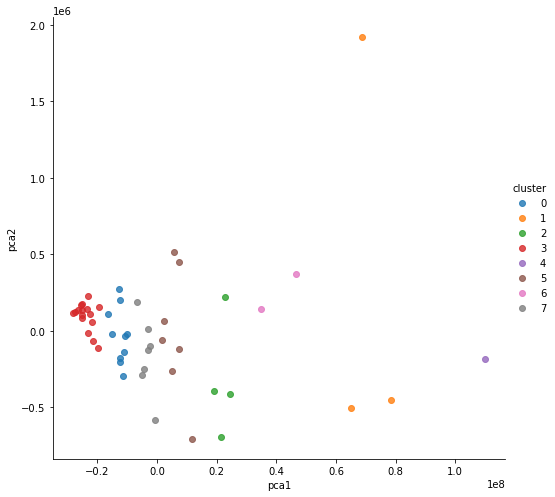

In [49]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2936102816787756e+16
Obj. Func: 5644726174371531.0
Obj. Func: 3150465646919047.0
Obj. Func: 2039932654586805.5
Obj. Func: 1148663825459830.2
Obj. Func: 654014385258030.5
Obj. Func: 405575989552643.8
Obj. Func: 317139891484444.4
Obj. Func: 251607928199550.4


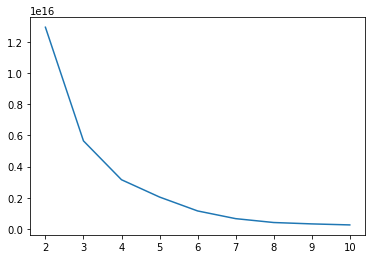

In [50]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(small2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

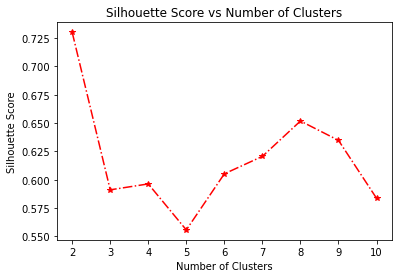

In [51]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(small2017.values) for k in k_range]
sscores = [silhouette_score(small2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

It seems consistent that the number of clusters in these examples is 8

In [52]:
clusterResults2017small = pd.concat([kmeans_3, small2017], axis=1, join='outer')
clusterResults2017small['Location'] = state_list
clusterResults2017small['Normalized_Death_Rate'] = normDR2017
clusterResults2017small['Num Deaths'] = numdeaths2017
clusterResults2017small.groupby(["cluster", "Location", 'Num Deaths']).mean()

pca1          pca2  Tot_Prscrbrs  \
cluster Location       Num Deaths                                             
0       Arkansas       446        -1.104735e+07 -1.403483e+05        8989.0   
        Colorado       1015       -1.234543e+07 -2.035356e+05       20053.0   
        Connecticut    1072       -1.267082e+07  2.723687e+05       17452.0   
        Iowa           341        -1.240772e+07  2.019523e+05       10773.0   
        Kansas         333        -1.508734e+07 -1.836402e+04       10019.0   
        Maryland       2247       -1.015031e+07 -2.199101e+04       23213.0   
        Mississippi    354        -1.078114e+07 -3.058973e+04        9151.0   
        Oklahoma       775        -1.137513e+07 -2.976109e+05       12041.0   
        Oregon         530        -1.230731e+07 -1.763718e+05       16408.0   
        West Virginia  974        -1.651376e+07  1.115704e+05        7363.0   
1       Florida        5088        7.835324e+07 -4.528908e+05       70945.0   
        New York       3921        6.865034e+07  1.917243e+06       92524.0   
        Texas          2989        6.517625e+07 -5.036960e+05       73744.0   
2       Georgia        1537        1.906613e+07 -3.906019e+05       29439.0   
        Illinois       2778        2.277460e+07  2.234841e+05       46798.0   
        Michigan       2694        2.142064e+07 -6.920800e+05       41803.0   
        North Carolina 2414        2.456878e+07 -4.119513e+05       35629.0   
3       Alaska         147        -2.807868e+07  1.180649e+05        2461.0   
        Delaware       338        -2.525325e+07  1.041445e+05        3525.0   
        Hawaii         203        -2.527765e+07  1.725956e+05        4278.0   
        Idaho          236        -2.302317e+07 -1.075216e+04        5313.0   
        Maine          424        -2.235779e+07  1.098596e+05        6115.0   
        Montana        119        -2.503764e+07  8.196071e+04        3914.0   
        Nebraska       152        -1.956415e+07  1.543157e+05        7066.0   
        Nevada         676        -1.967071e+07 -1.106737e+05        7913.0   
        New Hampshire  467        -2.351777e+07  1.427094e+05        5989.0   
        New Mexico     493        -2.187447e+07  6.059573e+04        7351.0   
        North Dakota   68         -2.552054e+07  1.683931e+05        2942.0   
        Rhode Island   320        -2.300688e+07  2.291464e+05        4960.0   
        South Dakota   73         -2.502617e+07  1.347728e+05        3341.0   
        Utah           650        -2.146956e+07 -6.558405e+04        8756.0   
        Vermont        134        -2.657788e+07  1.333122e+05        2739.0   
        Wyoming        69         -2.747511e+07  1.219654e+05        1817.0   
4       California     4868        1.099097e+08 -1.849775e+05      119832.0   
5       Indiana        1852        5.049932e+06 -2.611768e+05       21829.0   
        Kentucky       1566        1.762328e+06 -5.983215e+04       16154.0   
        Massachusetts  2168        5.714040e+06  5.182210e+05       35678.0   
        Missouri       1367        7.308580e+06 -1.203811e+05       21675.0   
        New Jersey     2685        7.266860e+06  4.518065e+05       31575.0   
        Tennessee      1776        1.178704e+07 -7.047104e+05       24842.0   
        Virginia       1507        2.277989e+06  6.511055e+04       26554.0   
6       Ohio           5111        3.503201e+07  1.432448e+05       45376.0   
        Pennsylvania   5388        4.647206e+07  3.690971e+05       57584.0   
7       Alabama        835        -7.855179e+05 -5.846632e+05       14415.0   
        Arizona        1532       -4.204681e+06 -2.512253e+05       22950.0   
        Louisiana      1108       -2.470408e+06 -1.015424e+05       16606.0   
        Minnesota      733        -6.826667e+06  1.855715e+05       22141.0   
        South Carolina 1008       -2.924648e+06 -1.225090e+05       15773.0   
        Washington     1169       -4.975288e+06 -2.879723e+05       26755.0   
        Wiscon

### Discussion of Clustering Results
1. It seems that these predictors have formed clusters in a way in which the number of deaths in the state is all similar despite not being clustered with this data. This is awesome, as it implies these predictors may actually be good ones! It however does not have a lot of consistency in predicting the normalized death rate.
2. The death rate was highly correlated with the prescription rates, so maybe I should take those out as well and see if these predictors still do an ok job at predicting or grouping the death rates.
3. The smaller dataset didn't seem to make any difference so the work going forward is all going to be done with the larger dataset. 
4. The clusters that did form seem to group Ohio and Pennsylvania together, midwestern states together, I wonder if geography has something to do with it

### Removing the prescriptions to see how that impacts our clusters

In [104]:
smaller2017.columns

Index(['Year', '2017_age_adjusted_rate', 'SmokingValue', 'UnemploymentValue',
       'FreqPhysDistressValue', 'ExcessiveDrinkingValue', 'EducationLTHSValue',
       'ECigValue', 'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [105]:
smaller2017=smaller2017.drop(columns=['2017_age_adjusted_rate'])

In [106]:
smaller2017.columns

Index(['Year', 'SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [56]:
smaller2017 = stats2017
#smaller2017 = stats2017.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
#smaller2017 = small2017.replace(',','', regex=True)
normLA2017 = stats2017['Normalized_Long-Acting_Rate']
normTotClms2017 = stats2017['Normalized_Tot_Opioid_Clms']
smaller2017 = smaller2017.drop(columns=['Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg', 'Normalized_Tot_Opioid_Clms', 'Normalized_Long-Acting_Rate'])

In [113]:
kmeans = KMeans(n_clusters=5).fit(smaller2017.values)

In [114]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [115]:
pca = PCA(n_components=2).fit(smaller2017)
# Perform the transform
pca_trans = pca.transform(smaller2017)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
21,4,4.295972,0.945230
48,0,-3.781468,-4.758311
6,3,-5.594772,1.677015
36,4,2.774244,3.259784
8,2,-1.798770,-0.630527


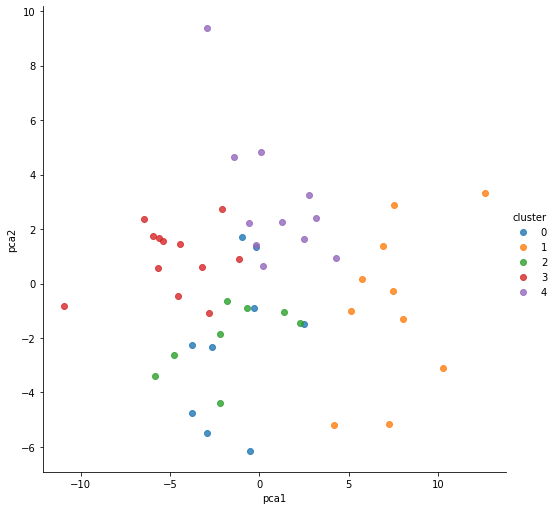

In [116]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1642.97743315508
Obj. Func: 1344.6617083333333
Obj. Func: 1145.1516923076924
Obj. Func: 1021.6912857142856
Obj. Func: 906.9818754578755
Obj. Func: 832.127767094017
Obj. Func: 739.5038095238097
Obj. Func: 665.2793690476192
Obj. Func: 610.319777777778


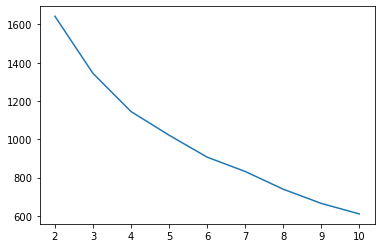

In [117]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smaller2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

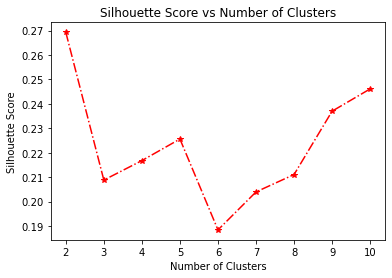

In [118]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smaller2017.values) for k in k_range]
sscores = [silhouette_score(smaller2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [119]:
clusterResults2017smaller = pd.concat([kmeans_3, smaller2017], axis=1, join='outer')
clusterResults2017smaller['Location'] = state_list
clusterResults2017smaller['Normalized_Death_Rate'] = normDR2017
clusterResults2017smaller['NumDeaths'] = numdeaths2017

clusterResults2017smaller.groupby(["cluster", "Location"]).NumDeaths.mean()
#clusterResults2017smaller['NumDeaths']=clusterResults2017smaller['NumDeaths'].astype(int)
#clusterResults2017smaller.groupby(["cluster"]).NumDeaths.var()


DataError: No numeric types to aggregate

In [120]:
clusterResults2017smaller.groupby(["cluster"])['Normalized_Death_Rate'].std()

cluster
0    219.954663
1     59.578754
2    247.327593
3     87.626598
4     10.388956
Name: Normalized_Death_Rate, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(clusterResults2017prescrip.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False, ax=ax)

### Discussion 
Removing data about the prescriptions actually decreases the number of clusters and less accurately clusters by death rate. Interestingly, the clusters sort of merged into one another. What if we take away more predictors?

### Removing more predictors

In [66]:
smallest2017 = smaller2017
#smaller2017 = stats2017.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
#smaller2017 = small2017.replace(',','', regex=True)
smallest2017 = smallest2017.drop(columns=['CancerValue', 'Depression65UpValue', 'ECigValue'])

In [124]:
smallest2017=smallest2017.drop(columns=['2017_age_adjusted_rate'])

In [133]:
kmeans = KMeans(n_clusters=5).fit(smallest2017.values)

In [134]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [135]:
pca = PCA(n_components=2).fit(smallest2017)
# Perform the transform
pca_trans = pca.transform(smallest2017)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
11,4,-1.721553,4.391685
33,3,-2.077152,-5.340448
12,1,-4.237322,-0.384038
2,3,-0.949212,-1.377928
41,0,6.918915,-0.122998


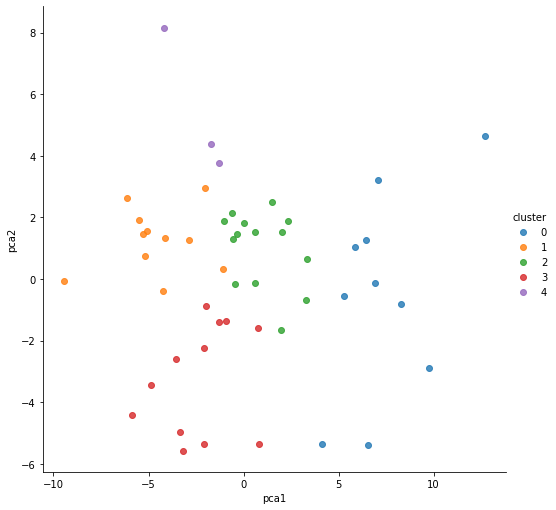

In [136]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1385.006095238095
Obj. Func: 1137.7434206349205
Obj. Func: 925.2805158730159
Obj. Func: 817.6100833333334
Obj. Func: 728.016901098901
Obj. Func: 630.0484102564103
Obj. Func: 565.6636868686869
Obj. Func: 507.1475992063491
Obj. Func: 471.7752142857141


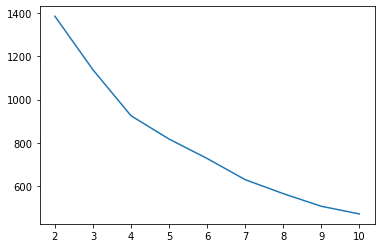

In [137]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smallest2017.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

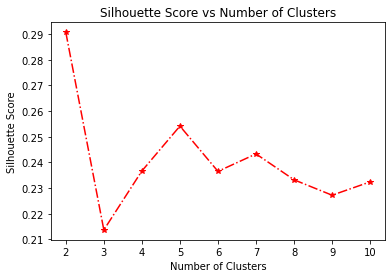

In [138]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smallest2017.values) for k in k_range]
sscores = [silhouette_score(smallest2017.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

5 proves to be an appropriate number of clusters for this smaller dataset

In [139]:
clusterResults2017smallest = pd.concat([kmeans_3, smallest2017], axis=1, join='outer')
clusterResults2017smallest['Location'] = state_list
clusterResults2017smallest['Normalized_Death_Rate'] = normDR2017
clusterResults2017smallest['NumDeaths'] = numdeaths2017

clusterResults2017smallest.groupby(["cluster", "Location"]).NumDeaths.mean()

DataError: No numeric types to aggregate

In [140]:
clusterResults2017smallest.groupby(["cluster"])['Normalized_Death_Rate'].std()

cluster
0     59.578754
1     90.816391
2    177.667477
3    207.542288
4      7.570330
Name: Normalized_Death_Rate, dtype: float64

### Discussion
It seems that these predictors may be okay in predicting number of deaths, but even more accurate alongside the presciption rates. This clustering seems to make groups of small, medium, and large death numbers. However, there are very obvious outliers. How about if I only include prescriptions as a predictor?

In [ ]:
prescriptionCluster = small2017

In [ ]:
kmeans = KMeans(n_clusters=8).fit(prescriptionCluster.values)

In [ ]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [ ]:
pca = PCA(n_components=2).fit(prescriptionCluster)
# Perform the transform
pca_trans = pca.transform(prescriptionCluster)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

In [ ]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

In [ ]:
clusterRange = range(2,11)
objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(prescriptionCluster.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)
plt.plot(clusterRange, objFuncs)

In [ ]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(prescriptionCluster.values) for k in k_range]
sscores = [silhouette_score(prescriptionCluster.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [ ]:
clusterResults2017prescrip = pd.concat([kmeans_3, prescriptionCluster], axis=1, join='outer')
clusterResults2017prescrip['Location'] = state_list
clusterResults2017prescrip['Normalized_Death_Rate'] = normDR2017
clusterResults2017prescrip['NumDeaths'] = numdeaths2017

clusterResults2017prescrip.groupby(["cluster", "Location"]).NumDeaths.mean()

# Conclusions
It seems that prescription data is definitely a more accurate predictor of number of opioid related deaths. These other predictors may play big factors, however since more of the population may suffer from things such as depression, smoking, etc and much less people suffer from opioid addiction, it may really compress our results. 

# 2018 Data Clustering

In [76]:
numdeaths2018 = stats2018['2018_num_deaths']
normDR2018 = stats2018['Normalized_Death_Rate']
stats2018 = stats2018.drop(columns=['State Name', 'Unnamed: 0', 'range_category', '2018_num_deaths', 'Normalized_Death_Rate'])

In [77]:
#Removing comma values so numbers can be translated to ints
stats2018 = stats2018.replace(',','', regex=True)

In [78]:
#Deal with missing values by replacing the dew NaN with mean
stats2018['ECigValue'].fillna(value=stats2018['ECigValue'].mean(), inplace=True)

In [79]:
kmeans = KMeans(n_clusters=8).fit(stats2018.values)
print(kmeans, "\n")

KMeans() 



In [80]:
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 4, 16,  3,  8,  1,  2, 10,  6], dtype=int64))


In [81]:
print(kmeans.cluster_centers_)

[[ 2.01800000e+03  3.95402500e+04  2.84537500e+04  2.61976625e+06
   5.11801632e+07  5.13000000e+00 -4.30000000e-01  2.90984000e+05
   1.09925000e+01 -4.87500000e-01  2.08750000e+01  4.85493636e+03
   4.89826750e+04  2.01800000e+03  1.69750000e+01  5.00000000e+00
   1.25500000e+01  1.81000000e+01  1.08750000e+01  5.52430556e+00
   1.53000000e+01  1.94500000e+01  6.95000000e+00]
 [ 2.01800000e+03  5.11012500e+03  3.59225000e+03  2.72423250e+05
   5.43223438e+06  4.92062500e+00 -4.28750000e-01  4.01298125e+04
   1.53356250e+01 -6.84375000e-01  2.02875000e+01  1.65667339e+03
   1.07233453e+04  2.01800000e+03  1.60125000e+01  4.35625000e+00
   1.17375000e+01  1.87375000e+01  9.27500000e+00  5.61197917e+00
   1.33812500e+01  1.90562500e+01  7.10625000e+00]
 [ 2.01800000e+03  8.20260000e+04  5.11653333e+04  4.21894900e+06
   1.00844928e+08  4.18000000e+00 -2.80000000e-01  4.91480667e+05
   1.18766667e+01 -4.26666667e-01  1.72000000e+01  4.14910020e+04
   3.14321690e+05  2.01800000e+03  1.390

In [82]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [83]:
pca = PCA(n_components=2).fit(stats2018)
# Perform the transform
pca_trans = pca.transform(stats2018)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
33,1,-2.557195e+07,154500.323293
32,0,2.438742e+07,-373364.351648
35,6,-1.155273e+07,-296328.387767
41,7,1.090573e+07,-623562.134626
6,6,-1.256200e+07,254212.383392


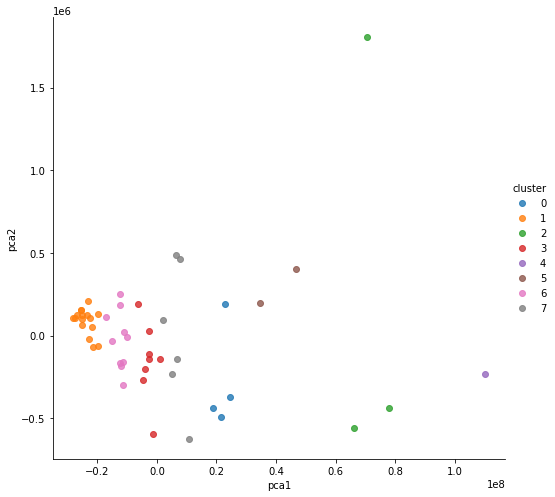

In [84]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2917177670149514e+16
Obj. Func: 5589844531312954.0
Obj. Func: 3061708944750526.5
Obj. Func: 1943962375357914.5
Obj. Func: 1156661471845130.8
Obj. Func: 650780773468784.5
Obj. Func: 374890862300220.1
Obj. Func: 302464899172964.75
Obj. Func: 231315403920171.97


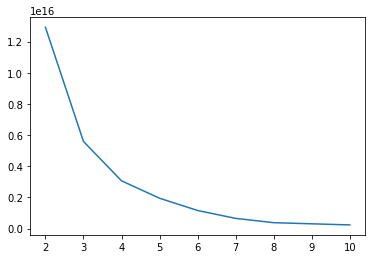

In [85]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(stats2018.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

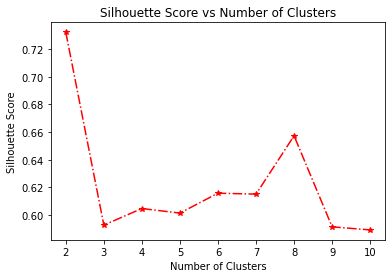

In [86]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(stats2018.values) for k in k_range]
sscores = [silhouette_score(stats2018.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

The number of clusters consistenly is showing to be appropriately 8

In [87]:
clusterResults2018 = pd.concat([kmeans_3, stats2018], axis=1, join='outer')
clusterResults2018['Normalized_Death_Rate'] = normDR2018
clusterResults2018['Num Deaths'] = numdeaths2018
clusterResults2018['State'] = state_list

In [91]:
clusterResults2018.groupby(["cluster"]).Normalized_Death_Rate.std()

cluster
0     69.784869
1     12.399756
2    329.528807
3     33.028222
4           NaN
5    296.586166
6     51.404086
7    101.528366
Name: Normalized_Death_Rate, dtype: float64

In [88]:
clusterResults2018.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1          pca2  Year  \
cluster State          Num Deaths                                     
0       Georgia        1,404       1.877073e+07 -4.351393e+05  2018   
        Illinois       2,722       2.282079e+07  1.908509e+05  2018   
        Michigan       2,591       2.143951e+07 -4.940155e+05  2018   
        North Carolina 2,259       2.438742e+07 -3.733644e+05  2018   
1       Alaska         110        -2.814780e+07  1.066581e+05  2018   
        Delaware       401        -2.519080e+07  9.833163e+04  2018   
        Hawaii         213        -2.535352e+07  1.547346e+05  2018   
        Idaho          250        -2.287307e+07 -1.790436e+04  2018   
        Maine          345        -2.242090e+07  1.067076e+05  2018   
        Montana        125        -2.501734e+07  6.388461e+04  2018   
        Nebraska       138        -1.967148e+07  1.280060e+05  2018   
        Nevada         688        -1.973243e+07 -6.336501e+04  2018   
        New Hampshire  452        -2.346834e+07  1.257591e+05  2018   
        New Mexico     537        -2.185700e+07  5.091673e+04  2018   
        North Dakota   70         -2.557195e+07  1.545003e+05  2018   
        Rhode Island   317        -2.323435e+07  2.086931e+05  2018   
        South Dakota   57         -2.503917e+07  1.232461e+05  2018   
        Utah           624        -2.146864e+07 -7.081777e+04  2018   
        Vermont        153        -2.669005e+07  1.244032e+05  2018   
        Wyoming        66         -2.750651e+07  1.073731e+05  2018   
2       Florida        4,698       7.779835e+07 -4.402842e+05  2018   
        New York       3,697       7.055805e+07  1.803860e+06  2018   
        Texas          3,005       6.627239e+07 -5.592250e+05  2018   
3       Alabama        775        -1.226817e+06 -5.943512e+05  2018   
        Arizona        1,670      -4.060330e+06 -2.047260e+05  2018   
        Kentucky       1,315       1.091349e+06 -1.399503e+05  2018   
        Louisiana      1,140      -2.635268e+06 -1.435096e+05  2018   
        Minnesota      636        -6.257047e+06  1.930498e+05  2018   
        South Carolina 1,125      -2.826424e+06 -1.083868e+05  2018   
        Washington     1,164      -4.631461e+06 -2.667087e+05  2018   
        Wisconsin      1,079      -2.649879e+06  3.004804e+04  2018   
4       California     5,348       1.101424e+08 -2.316403e+05  2018   
5       Ohio           3,980       3.471144e+07  1.968664e+05  2018   
        Pennsylvania   4,415       4.663395e+07  4.033524e+05  2018   
6       Arkansas       444        -1.131542e+07 -1.570382e+05  2018   
        Colorado       995        -1.219845e+07 -1.845673e+05  2018   
        Connecticut    1,069      -1.256200e+07  2.542124e+05  2018   
        Iowa           287        -1.248498e+07  1.856949e+05  2018   
        Kansas         345        -1.526048e+07 -3.134534e+04  2018   
        Maryland       2,324      -9.902636e+06 -7.264867e+03  2018   
        Mississippi    310        -1.109878e+07  1.980730e+04  2018   
        Oklahoma       716        -1.155273e+07 -2.963284e+05  2018   
        Oregon         547        -1.225252e+07 -1.681641e+05  2018   
        West Virginia  856        -1.699897e+07  1.128850e+05  2018   
7       Indiana        1,629       4.905754e+06 -2.339509e+05  2018   
        Massachusetts  2,241       6.331755e+06  4.848939e+05  2018   
        Missouri       1,610       6.632655e+06 -1.409589e+05  2018   
        New Jersey     2,900       7.627143e+06  4.628903e+05  2018   
        Tennessee      1,823       1.090573e+07 -6.235621e+05  2018   
        Virginia       1,448       2.128111e+06  9.494313e+04  2018   

                                   Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
cluster State          Num Deaths                                      
0       Georgia        1,404            30991.0              21722.0   
        Illinois       2,722            47788.0              33088.0   
        Michigan       2,591            42519.0              3

In [89]:
clusterResults2018.groupby(["cluster", "State", "Normalized_Death_Rate"]).mean()

pca1          pca2  \
cluster State          Normalized_Death_Rate                               
0       Georgia        6.608826               1.877073e+07 -4.351393e+05   
        Illinois       155.495231             2.282079e+07  1.908509e+05   
        Michigan       37.645466              2.143951e+07 -4.940155e+05   
        North Carolina 11.566612              2.438742e+07 -3.733644e+05   
1       Alaska         14.963157             -2.814780e+07  1.066581e+05   
        Delaware       41.533788             -2.519080e+07  9.833163e+04   
        Hawaii         2.026423              -2.535352e+07  1.547346e+05   
        Idaho          17.598285             -2.287307e+07 -1.790436e+04   
        Maine          7.403926              -2.242090e+07  1.067076e+05   
        Montana        2.041942              -2.501734e+07  6.388461e+04   
        Nebraska       13.010706             -1.967148e+07  1.280060e+05   
        Nevada         35.728864             -1.973243e+07 -6.336501e+04   
        New Hampshire  14.930594             -2.346834e+07  1.257591e+05   
        New Mexico     6.043197              -2.185700e+07  5.091673e+04   
        North Dakota   0.674269              -2.557195e+07  1.545003e+05   
        Rhode Island   2.476384              -2.323435e+07  2.086931e+05   
        South Dakota   1.121130              -2.503917e+07  1.232461e+05   
        Utah           2.179634              -2.146864e+07 -7.081777e+04   
        Vermont        4.851675              -2.669005e+07  1.244032e+05   
        Wyoming        1.136480              -2.750651e+07  1.073731e+05   
2       Florida        669.662902             7.779835e+07 -4.402842e+05   
        New York       176.658268             7.055805e+07  1.803860e+06   
        Texas          44.376311              6.627239e+07 -5.592250e+05   
3       Alabama        15.856190             -1.226817e+06 -5.943512e+05   
        Arizona        23.330461             -4.060330e+06 -2.047260e+05   
        Kentucky       45.167910              1.091349e+06 -1.399503e+05   
        Louisiana      25.553932             -2.635268e+06 -1.435096e+05   
        Minnesota      6.370146              -6.257047e+06  1.930498e+05   
        South Carolina 106.303867            -2.826424e+06 -1.083868e+05   
        Washington     13.692046             -4.631461e+06 -2.667087e+05   
        Wisconsin      59.801883             -2.649879e+06  3.004804e+04   
4       California     13.552420              1.101424e+08 -2.316403e+05   
5       Ohio           525.010553             3.471144e+07  1.968664e+05   
        Pennsylvania   105.574375             4.663395e+07  4.033524e+05   
6       Arkansas       14.752139             -1.131542e+07 -1.570382e+05   
        Colorado       17.482865             -1.219845e+07 -1.845673e+05   
        Connecticut    29.931234             -1.256200e+07  2.542124e+05   
        Iowa           4.286463              -1.248498e+07  1.856949e+05   
        Kansas         10.957188             -1.526048e+07 -3.134534e+04   
        Maryland       173.554972            -9.902636e+06 -7.264867e+03   
        Mississippi    5.529544              -1.109878e+07  1.980730e+04   
        Oklahoma       6.132058              -1.155273e+07 -2.963284e+05   
        Oregon         13.882421             -1.225252e+07 -1.681641e+05   
        West Virginia  11.377125             -1.699897e+07  1.128850e+05   
7       Indiana        12.803513              4.905754e+06 -2.339509e+05   
        Massachusetts  37.128455              6.331755e+06  4.848939e+05   
        Missouri       54.008360              6.632655e+06 -1.409589e+05   
        New Jersey     214.264868             7.627143e+06  4.628903e+05   
        Tennessee      207.466046             1.090573e+07 -6.235621e+05   
        Virginia       231.918226             2.128111e+06  9.494313e+04   

                                              Year  Tot_Prscrbrs  \
cluster State          Normalized

### Discussion
It appears that these parameters actually form the same clusters as they did in the previous year. And it seems to still not be a good predictor of death rate but an ok predictor of number of deaths. 

In [92]:
stats2018.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2018_age_adjusted_rate',
       'Normalized_Long-Acting_Rate', 'Normalized_Tot_Opioid_Clms',
       'Source Year', 'SmokingValue', 'UnemploymentValue',
       'FreqPhysDistressValue', 'ExcessiveDrinkingValue', 'EducationLTHSValue',
       'ECigValue', 'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [93]:
smaller2018 = stats2018
normLA2018 = stats2018['Normalized_Long-Acting_Rate']
normTotClms2018 = stats2018['Normalized_Tot_Opioid_Clms']
#smaller2018 = smaller2018.drop(columns=['state', 'Year', 'state.1', 'Breakout_Type', 'Breakout', 'range_category', 'Prscrbr_Geo_Lvl', 'RUCA_Cd', 'Prscrbr_Geo_Cd', 'Opioid_Prscrbng_Rate_5Y_Chg', 'LA_Opioid_Prscrbng_Rate_5Y_Chg', '2017_num_deaths', 'Normalized_Death_Rate'])
#smaller2017 = small2017.replace(',','', regex=True)

smaller2018 = smaller2018.drop(columns=['Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg', 'Normalized_Tot_Opioid_Clms', 'Normalized_Long-Acting_Rate', '2018_age_adjusted_rate', 'Year', 'Source Year'])

In [94]:
smaller2018.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [95]:
kmeans = KMeans(n_clusters=5).fit(smaller2018.values)
print(kmeans, "\n")

KMeans(n_clusters=5) 



In [96]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [97]:
pca = PCA(n_components=2).fit(smaller2018)
# Perform the transform
pca_trans = pca.transform(smaller2018)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
15,1,1.278639,1.027662
32,1,1.481974,-0.345544
19,4,-5.700166,3.913160
26,0,-4.840420,-3.417552
47,3,13.606103,-0.405657


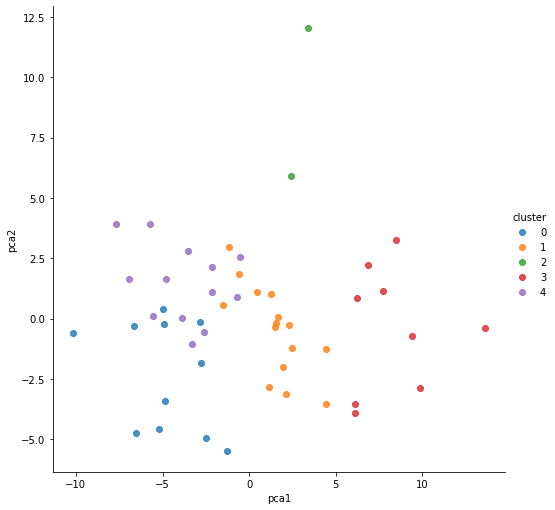

In [98]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1667.4041919146734
Obj. Func: 1422.2332885431108
Obj. Func: 1223.7999909628202
Obj. Func: 1025.2646033006824
Obj. Func: 894.7307007520086
Obj. Func: 804.8960227797752
Obj. Func: 745.4762536576079
Obj. Func: 656.2128318972906
Obj. Func: 633.5182130731921


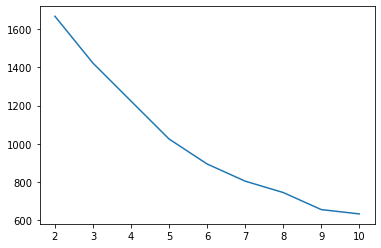

In [99]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smaller2018.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

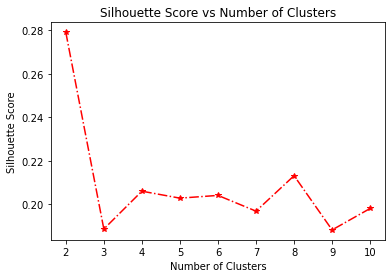

In [100]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smaller2018.values) for k in k_range]
sscores = [silhouette_score(smaller2018.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [101]:
clusterResults2018smaller = pd.concat([kmeans_3, smaller2018], axis=1, join='outer')
clusterResults2018smaller['Normalized_Death_Rate'] = normDR2018
clusterResults2018smaller['Num Deaths'] = numdeaths2018
clusterResults2018smaller['State'] = state_list

In [103]:
clusterResults2018smaller.groupby(["cluster"]).Normalized_Death_Rate.std()

cluster
0     46.446198
1    132.624738
2      8.140505
3     64.531612
4    183.108677
Name: Normalized_Death_Rate, dtype: float64

In [102]:
clusterResults2018smaller.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1       pca2  SmokingValue  \
cluster State          Num Deaths                                       
0       Colorado       995         -6.622279  -0.311259          14.5   
        Hawaii         213        -10.160273  -0.613057          13.4   
        Illinois       2,722       -2.862472  -0.142395          15.5   
        Iowa           287         -6.528802  -4.742118          16.6   
        Massachusetts  2,241       -4.965664   0.400958          13.4   
        Minnesota      636         -4.917046  -0.209628          15.1   
        Nebraska       138         -4.840420  -3.417552          16.0   
        North Dakota   70          -1.305551  -5.478521          19.1   
        South Dakota   57          -5.194010  -4.589072          19.0   
        Wisconsin      1,079       -2.484637  -4.946301          16.4   
        Wyoming        66          -2.792020  -1.848338          18.8   
1       Alaska         110          1.165265  -2.820542          19.1   
        Idaho          250         -1.180938   2.985669          14.7   
        Indiana        1,629        2.101206  -3.122361          21.1   
        Kansas         345          1.278639   1.027662          17.2   
        Maine          345          2.485064  -1.217235          17.8   
        Michigan       2,591        4.460680  -1.281483          18.9   
        Missouri       1,610        4.460889  -3.543505          19.4   
        Montana        125          1.531044  -0.183603          18.0   
        New Hampshire  452         -1.518423   0.551881          15.6   
        North Carolina 2,259        1.481974  -0.345544          17.4   
        Ohio           3,980        1.946931  -1.991735          20.5   
        Pennsylvania   4,415        1.671701   0.080429          17.0   
        Rhode Island   317          0.436685   1.092765          14.6   
        South Carolina 1,125        2.299003  -0.259527          18.0   
        Vermont        153         -0.613754   1.836255          13.7   
2       Utah           624          3.417493  12.067307           9.0   
        Washington     1,164        2.399982   5.930679          12.0   
3       Alabama        775          8.476703   3.275705          19.2   
        Arkansas       444          6.114589  -3.933305          22.7   
        Kentucky       1,315        9.893322  -2.885724          23.4   
        Louisiana      1,140        6.094111  -3.548787          20.5   
        Mississippi    310          6.216938   0.836391          20.5   
        Oklahoma       716          7.709600   1.152604          19.7   
        Oregon         547          6.858767   2.233896          15.6   
        Tennessee      1,823        9.375404  -0.744617          20.7   
        West Virginia  856         13.606103  -0.405657          25.2   
4       Arizona        1,670       -2.166513   1.118122          14.0   
        California     5,348       -4.778580   1.629300          11.2   
        Connecticut    1,069       -6.930814   1.654380          12.2   
        Delaware       401         -3.306165  -1.053417          16.5   
        Florida        4,698       -3.881527   0.036680          14.5   
        Georgia        1,404       -0.686361   0.908504          16.1   
        Maryland       2,324       -5.700166   3.913160          12.5   
        Nevada         688         -2.172459   2.121012          15.7   
        New Jersey     2,900       -7.713219   3.931783          13.1   
        New Mexico     537         -0.509281   2.537413          15.2   
        New York       3,697       -5.526415   0.085043          12.8   
        Texas          3,005       -2.585706  -0.554515          14.4   
        Virginia       1,448       -3.538600   2.782199          14.9   

                                   UnemploymentValue  FreqPhysDistressValue  \
cluster State          Num Deaths                                             
0       Colorado       995                       4.0                    9.8   
      

### Discussion
It seems the predictors did a better job at organizing the results based by the number of deaths this time around. There were also fewer clusters where the first cluster had very low values generally for the number of deaths, the second cluster was the one that had very high number of deaths (but didn't include Ohio or Pennsylvania). The last cluster was all very low in the death numbers as well except had a few outliers. There was also a small cluster that only had Utah and COlorade for some reason but they are very close in the number of deaths as well. 

### Minimizing the predictors again

In [141]:
smallest2018 = smaller2018
smallest2018.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [142]:
smallest2018 = smallest2018.drop(columns=['CancerValue', 'ECigValue', 'Depression65UpValue'])

In [143]:
smallest2018.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'DepressionValue'],
      dtype='object')

In [153]:
kmeans = KMeans(n_clusters=4).fit(smallest2018.values)

In [154]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [155]:
pca = PCA(n_components=2).fit(smallest2018)
# Perform the transform
pca_trans = pca.transform(smallest2018)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
6,3,-6.240321,1.296583
36,2,4.846656,1.606181
49,0,-0.881078,-0.010322
16,1,8.749901,-2.648821
31,3,-5.316809,-1.538498


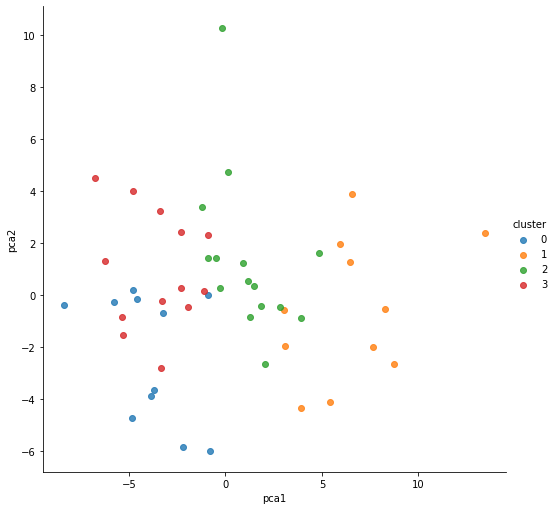

In [156]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1416.5901666666666
Obj. Func: 1157.7635154061622
Obj. Func: 956.4616503496503
Obj. Func: 826.0257217782216
Obj. Func: 727.261857142857
Obj. Func: 639.2351428571429
Obj. Func: 579.2733333333334
Obj. Func: 504.5316904761905
Obj. Func: 465.1108968253969


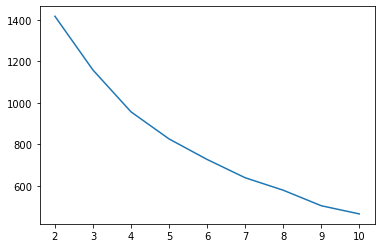

In [157]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smallest2018.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

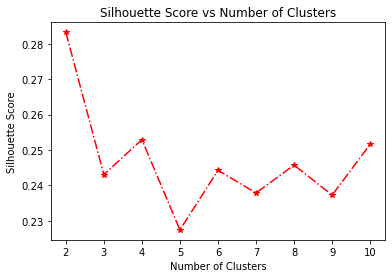

In [158]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smallest2018.values) for k in k_range]
sscores = [silhouette_score(smallest2018.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [159]:
clusterResults2018smallest = pd.concat([kmeans_3, smallest2018], axis=1, join='outer')
clusterResults2018smallest['Normalized_Death_Rate'] = normDR2018
clusterResults2018smallest['Num Deaths'] = numdeaths2018
clusterResults2018smallest['State'] = state_list

In [160]:
clusterResults2018smallest.groupby(["cluster"]).Normalized_Death_Rate.std()

cluster
0     46.446198
1    157.340532
2     34.240653
3    183.108677
Name: Normalized_Death_Rate, dtype: float64

In [151]:
clusterResults2018smallest.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1       pca2  SmokingValue  \
cluster State          Num Deaths                                       
0       Oregon         547          4.846656   1.606181          15.6   
        Utah           624         -0.159769  10.287462           9.0   
        Vermont        153         -0.902554   1.408444          13.7   
        Washington     1,164        0.155579   4.728364          12.0   
1       Alaska         110          2.058589  -2.673622          19.1   
        Indiana        1,629        3.089403  -1.972482          21.1   
        Louisiana      1,140        5.411057  -4.115213          20.5   
        Missouri       1,610        3.922762  -4.343829          19.4   
        North Carolina 2,259        1.264326  -0.832033          17.4   
        South Carolina 1,125        1.832178  -0.440503          18.0   
2       Colorado       995         -5.759023  -0.277829          14.5   
        Connecticut    1,069       -6.240321   1.296583          12.2   
        Hawaii         213         -8.357053  -0.370883          13.4   
        Illinois       2,722       -3.228141  -0.690054          15.5   
        Massachusetts  2,241       -4.794862   0.182898          13.4   
        Minnesota      636         -4.589405  -0.155105          15.1   
        Nevada         688         -2.289246   2.406931          15.7   
        New Jersey     2,900       -6.766311   4.513210          13.1   
        Virginia       1,448       -3.378338   3.223783          14.9   
3       Alabama        775          6.578523   3.881119          19.2   
        Arkansas       444          7.628545  -2.023078          22.7   
        Kentucky       1,315        8.749901  -2.648821          23.4   
        Mississippi    310          5.939313   1.962027          20.5   
        Oklahoma       716          6.456595   1.256987          19.7   
        Tennessee      1,823        8.269175  -0.550713          20.7   
        West Virginia  856         13.454710   2.387444          25.2   
4       Arizona        1,670       -2.320407   0.269990          14.0   
        California     5,348       -5.350584  -0.854437          11.2   
        Delaware       401         -1.917722  -0.459818          16.5   
        Florida        4,698       -3.273306  -0.229857          14.5   
        Georgia        1,404       -1.082772   0.154585          16.1   
        Maryland       2,324       -4.788081   4.008275          12.5   
        New Mexico     537         -0.921444   2.308002          15.2   
        New York       3,697       -5.316809  -1.538498          12.8   
        Texas          3,005       -3.325843  -2.816402          14.4   
5       Idaho          250         -1.221179   3.371297          14.7   
        Kansas         345          0.909654   1.236369          17.2   
        Maine          345          2.811051  -0.474729          17.8   
        Michigan       2,591        3.898333  -0.900091          18.9   
        Montana        125          1.171603   0.548396          18.0   
        New Hampshire  452         -0.485622   1.419746          15.6   
        Ohio           3,980        3.017257  -0.575270          20.5   
        Pennsylvania   4,415        1.503992   0.339565          17.0   
        Rhode Island   317         -0.300906   0.277734          14.6   
        Wyoming        66          -0.881078  -0.010322          18.8   
6       Iowa           287         -4.836107  -4.752788          16.6   
        Nebraska       138         -3.845426  -3.870981          16.0   
        North Dakota   70          -0.775476  -5.992032          19.1   
        South Dakota   57          -3.681840  -3.643158          19.0   
        Wisconsin      1,079       -2.179577  -5.862845          16.4   

                                   UnemploymentValue  FreqPhysDistressValue  \
cluster State          Num Deaths                                             
0       Oregon         547                       5.1                   15.6   
      

### Discussion 
It seems like maybe for the 2018 data these clusters did an ok job at predicting a death number. It seems that they're all generally pretty similar with some obvious outliers. 

# 2019 Data Clustering

In [161]:
stats2019 = pd.read_csv("totals2019.csv")
normDR2019 = stats2019['Normalized_Death_Rate']
numDeaths2019 = stats2019['2019 Number of Deaths']
stats2019.columns

Index(['Unnamed: 0', 'state', 'Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs',
       'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate',
       'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms',
       'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg',
       'Range Category', '2019 Age-adjusted Rate', '2019 Number of Deaths',
       'Normalized_Death_Rate', 'Normalized_Long-Acting_Rate',
       'Normalized_Tot_Opioid_Clms', 'State Name', 'SmokingValue',
       'UnemploymentValue', 'FreqPhysDistressValue', 'ExcessiveDrinkingValue',
       'EducationLTHSValue', 'ECigValue', 'Depression65UpValue',
       'DepressionValue', 'CancerValue'],
      dtype='object')

In [162]:
#Dropping these columns since they're non numerical or useless
stats2019 = stats2019.drop(columns=['state', 'Unnamed: 0', 'Range Category', 'State Name', '2019 Number of Deaths', 'Normalized_Death_Rate', 'Normalized_Long-Acting_Rate'])

In [173]:
stats2019.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2019 Age-adjusted Rate',
       'Normalized_Tot_Opioid_Clms', 'SmokingValue', 'UnemploymentValue',
       'FreqPhysDistressValue', 'ExcessiveDrinkingValue', 'EducationLTHSValue',
       'ECigValue', 'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [163]:
stats2019 = stats2019.replace(',','', regex=True)

In [164]:
#Deal with missing values by replacing the dew NaN with mean
stats2019['ECigValue'].fillna(value=stats2019['ECigValue'].mean(), inplace=True)

In [165]:
kmeans = KMeans(n_clusters=8).fit(stats2019.values)
print(kmeans, "\n")

KMeans() 



In [166]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [167]:
pca = PCA(n_components=2).fit(stats2019)
# Perform the transform
pca_trans = pca.transform(stats2019)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
2,7,-3.702881e+06,-197230.613929
27,0,-1.958987e+07,-64617.618206
19,5,-9.814510e+06,-17310.961271
10,0,-2.545878e+07,149560.367653
47,5,-1.748616e+07,116917.683507


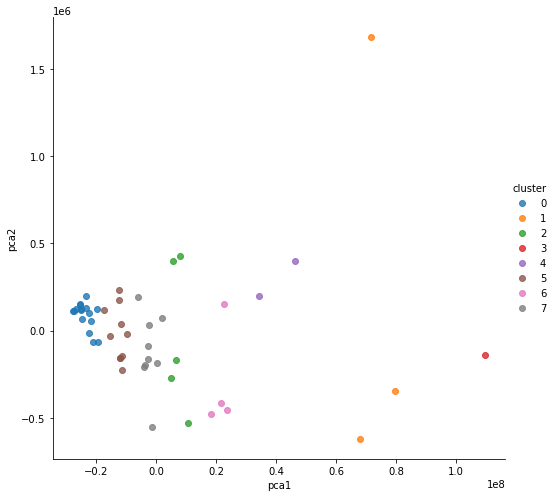

In [168]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1.2830029034240906e+16
Obj. Func: 5503522378920721.0
Obj. Func: 3017679805689134.0
Obj. Func: 1905409362945682.0
Obj. Func: 1108503691651015.1
Obj. Func: 640434867710866.4
Obj. Func: 367180492324388.1
Obj. Func: 297169517447985.94
Obj. Func: 222441542625264.2


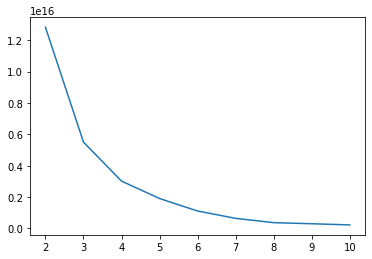

In [169]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(stats2019.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

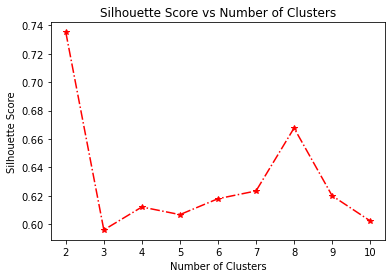

In [170]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(stats2019.values) for k in k_range]
sscores = [silhouette_score(stats2019.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [174]:
clusterResults2019 = pd.concat([kmeans_3, stats2019], axis=1, join='outer')
clusterResults2019['Normalized_Death_Rate'] = normDR2019
clusterResults2019['NumDeaths'] = numDeaths2019
clusterResults2019['State'] = state_list
clusterResults2019.groupby(["cluster", "State", "Normalized_Death_Rate"]).mean()

pca1          pca2  \
cluster State          Normalized_Death_Rate                               
0       Alaska         18.044003             -2.779013e+07  1.133647e+05   
        Delaware       44.672015             -2.513272e+07  1.189209e+05   
        Hawaii         13.261222             -2.545878e+07  1.495604e+05   
        Idaho          17.091941             -2.265620e+07 -1.098415e+04   
        Maine          27.254380             -2.247421e+07  1.018846e+05   
        Montana        25.792563             -2.496240e+07  6.749926e+04   
        Nebraska       13.379766             -1.973125e+07  1.265141e+05   
        Nevada         8.322960              -1.958987e+07 -6.461762e+04   
        New Hampshire  21.005430             -2.345959e+07  1.291852e+05   
        New Mexico     31.580050             -2.181603e+07  5.792922e+04   
        North Dakota   21.605472             -2.560290e+07  1.526707e+05   
        Rhode Island   34.190000             -2.348453e+07  1.976417e+05   
        South Dakota   21.888961             -2.506658e+07  1.266853e+05   
        Utah           10.815329             -2.132733e+07 -6.537930e+04   
        Vermont        17.810589             -2.674357e+07  1.261986e+05   
        Wyoming        20.627112             -2.757458e+07  1.109297e+05   
1       Florida        44.066658              7.957131e+07 -3.448444e+05   
        New York       28.566946              7.155407e+07  1.682156e+06   
        Texas          30.589351              6.806359e+07 -6.202876e+05   
2       Indiana        22.017356              4.722864e+06 -2.728295e+05   
        Massachusetts  39.185005              5.501347e+06  4.003403e+05   
        Missouri       13.238584              6.482035e+06 -1.701665e+05   
        New Jersey     29.932831              8.048492e+06  4.290471e+05   
        Tennessee      9.721260               1.069245e+07 -5.327578e+05   
3       California     15.686285              1.096664e+08 -1.425295e+05   
4       Ohio           10.760279              3.431415e+07  1.971081e+05   
        Pennsylvania   14.581279              4.614490e+07  3.989516e+05   
5       Arkansas       12.857031             -1.151100e+07 -1.462669e+05   
        Colorado       18.736751             -1.200201e+07 -1.582248e+05   
        Connecticut    34.050555             -1.254713e+07  2.308911e+05   
        Iowa           25.236850             -1.258229e+07  1.734813e+05   
        Kansas         11.156646             -1.532459e+07 -3.360136e+04   
        Maryland       27.599813             -9.814510e+06 -1.731096e+04   
        Mississippi    14.043470             -1.170333e+07  4.090915e+04   
        Oklahoma       36.367214             -1.150406e+07 -2.245717e+05   
        Oregon         16.300347             -1.207164e+07 -1.556032e+05   
        West Virginia  16.533391             -1.748616e+07  1.169177e+05   
6       Georgia        24.527724              1.824702e+07 -4.771716e+05   
        Illinois       14.828784              2.254467e+07  1.539333e+05   
        Michigan       32.063824              2.150124e+07 -4.138664e+05   
        North Carolina 18.592997              2.371758e+07 -4.531900e+05   
7       Alabama        15.663288             -1.372200e+06 -5.536305e+05   
        Arizona        26.199672             -3.702881e+06 -1.972306e+05   
        Kentucky       13.833044              1.894139e+05 -1.881462e+05   
        Louisiana      30.888563             -2.818045e+06 -1.636270e+05   
        Minnesota      23.881387             -6.069951e+06  1.930045e+05   
        South Carolina 28.979734             -2.699907e+06 -8.616945e+04   
        Virginia       21.314478              1.773346e+06  7.272589e+04   
        Washington     18.124264             -4.214358e+06 -2.086967e+05   
        Wisconsin      48.545125             -2.440154e+06  3.325371e+04   

                                              Year  Tot_Prscrbrs  \
cluster State          Normalized

In [175]:
clusterResults2019.groupby(["cluster"]).Normalized_Death_Rate.std()

cluster
0     9.374414
1     8.425843
2    12.066798
3          NaN
4     2.701855
5     8.980835
6     7.520873
7    10.486032
Name: Normalized_Death_Rate, dtype: float64

In [214]:
smaller2019 = stats2019
smaller2019.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2019 Age-adjusted Rate',
       'Normalized_Tot_Opioid_Clms', 'SmokingValue', 'UnemploymentValue',
       'FreqPhysDistressValue', 'ExcessiveDrinkingValue', 'EducationLTHSValue',
       'ECigValue', 'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [219]:
smaller2019 = smaller2019.drop(columns=['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2019 Age-adjusted Rate',
       'Normalized_Tot_Opioid_Clms'])

In [221]:
kmeans = KMeans(n_clusters=3).fit(smaller2019.values)
print(kmeans, "\n")

KMeans(n_clusters=3) 



In [222]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [223]:
pca = PCA(n_components=2).fit(smaller2019)
# Perform the transform
pca_trans = pca.transform(smaller2019)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
49,2,-0.606779,1.288199
19,2,-5.518039,2.589678
14,2,-6.067980,-3.702743
48,2,-2.484338,-4.868770
30,2,-0.187712,1.189419


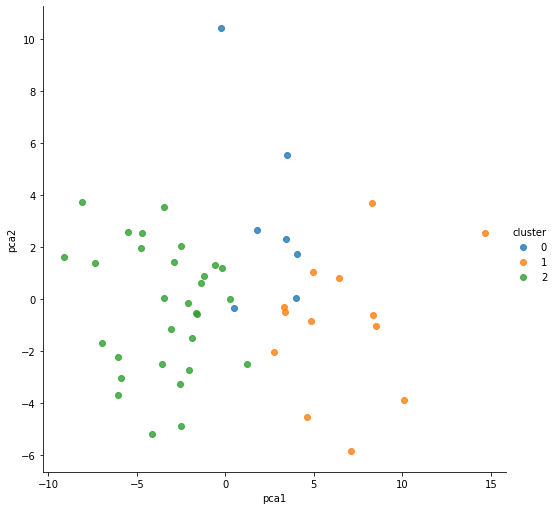

In [224]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

In [227]:
smaller2019.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'ECigValue',
       'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

Obj. Func: 1602.7674496688253
Obj. Func: 1353.8422768553994
Obj. Func: 1162.2386026989398
Obj. Func: 1032.017307489611
Obj. Func: 917.7566485656835
Obj. Func: 798.3038175307418
Obj. Func: 719.7531288947677
Obj. Func: 646.9299812426513
Obj. Func: 585.9654016704745


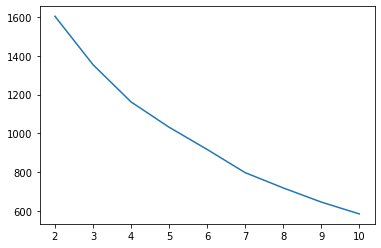

In [228]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smaller2019.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

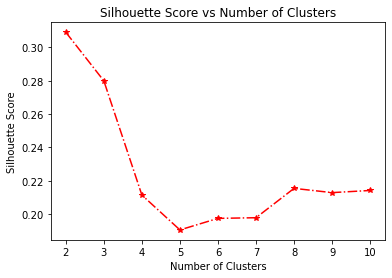

In [229]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smaller2019.values) for k in k_range]
sscores = [silhouette_score(smaller2019.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [230]:
clusterResults2019smaller = pd.concat([kmeans_3, stats2019], axis=1, join='outer')
clusterResults2019smaller['Normalized_Death_Rate'] = normDR2019
clusterResults2019smaller['NumDeaths'] = numDeaths2019
clusterResults2019smaller['State'] = state_list
clusterResults2019smaller.groupby(["cluster", "State", "Normalized_Death_Rate"]).mean()

pca1       pca2  Year  \
cluster State          Normalized_Death_Rate                               
0       Idaho          17.091941               1.797390   2.658712  2019   
        Maine          27.254380               3.973462   0.043163  2019   
        Montana        25.792563               4.037202   1.722709  2019   
        Oregon         16.300347               3.421191   2.299606  2019   
        Utah           10.815329              -0.220417  10.429162  2019   
        Vermont        17.810589               0.463422  -0.352461  2019   
        Washington     18.124264               3.473694   5.539905  2019   
1       Alabama        15.663288               8.266467   3.675622  2019   
        Arkansas       12.857031               8.497031  -1.018263  2019   
        Indiana        22.017356               3.347185  -0.493116  2019   
        Kentucky       13.833044              10.077417  -3.875901  2019   
        Louisiana      30.888563               7.072235  -5.825791  2019   
        Michigan       32.063824               3.309186  -0.317341  2019   
        Mississippi    14.043470               4.961875   1.024425  2019   
        Missouri       13.238584               4.590065  -4.519734  2019   
        North Carolina 18.592997               4.848757  -0.852799  2019   
        Ohio           10.760279               2.733339  -2.054515  2019   
        Oklahoma       36.367214               6.430977   0.825724  2019   
        Tennessee      9.721260                8.322745  -0.599383  2019   
        West Virginia  16.533391              14.676512   2.532597  2019   
2       Alaska         18.044003              -2.069898  -2.735209  2019   
        Arizona        26.199672              -3.087059  -1.143835  2019   
        California     15.686285              -6.962243  -1.701871  2019   
        Colorado       18.736751              -4.752919   1.952720  2019   
        Connecticut    34.050555              -7.386570   1.370157  2019   
        Delaware       44.672015              -1.665975  -0.534825  2019   
        Florida        44.066658              -1.586765  -0.594866  2019   
        Georgia        24.527724              -1.903013  -1.492255  2019   
        Hawaii         13.261222              -9.113676   1.607514  2019   
        Illinois       14.828784              -3.479660   0.046589  2019   
        Iowa           25.236850              -6.067980  -3.702743  2019   
        Kansas         11.156646              -1.393312   0.615491  2019   
        Maryland       27.599813              -5.518039   2.589678  2019   
        Massachusetts  39.185005              -4.679901   2.530524  2019   
        Minnesota      23.881387              -2.898091   1.407616  2019   
        Nebraska       13.379766              -5.916072  -3.020929  2019   
        Nevada         8.322960               -2.521747   2.050991  2019   
        New Hampshire  21.005430              -1.212596   0.865461  2019   
        New Jersey     29.932831              -8.105485   3.730853  2019   
        New Mexico     31.580050              -0.187712   1.189419  2019   
        New York       28.566946              -6.054412  -2.218420  2019   
        North Dakota   21.605472              -4.170377  -5.186761  2019   
        Pennsylvania   14.581279               0.242030  -0.001989  2019   
        Rhode Island   34.190000              -2.122121  -0.167639  2019   
        South Carolina 28.979734               1.248646  -2.514024  2019   
        South Dakota   21.888961              -3.603566  -2.500566  2019   
        Texas          30.589351              -2.540231  -3.256289  2019   
        Virginia       21.314478              -3.479872   3.553455  2019   
        Wisconsin      48.545125              -2.484338  -4.868770  2019   
        Wyoming        20.627112              -0.606779   1.288199  2019   

                                              Tot_Prscrbrs  \
cluster State          Normalized_De

In [231]:
clusterResults2019smaller.groupby(["cluster"]).Normalized_Death_Rate.mean()

cluster
0    19.027059
1    18.967715
2    25.208095
Name: Normalized_Death_Rate, dtype: float64

### Lowering the predictors

In [177]:
smallest2019 = stats2019
smallest2019.columns

Index(['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms',
       'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg',
       'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate',
       'LA_Opioid_Prscrbng_Rate_1Y_Chg', '2019 Age-adjusted Rate',
       'Normalized_Tot_Opioid_Clms', 'SmokingValue', 'UnemploymentValue',
       'FreqPhysDistressValue', 'ExcessiveDrinkingValue', 'EducationLTHSValue',
       'ECigValue', 'Depression65UpValue', 'DepressionValue', 'CancerValue'],
      dtype='object')

In [189]:
smallest2019 = smallest2019.drop(columns=['Year', 'Tot_Prscrbrs', 'Tot_Opioid_Prscrbrs', 'Tot_Opioid_Clms', 'Tot_Clms', 'Opioid_Prscrbng_Rate', 'Opioid_Prscrbng_Rate_1Y_Chg', 'LA_Tot_Opioid_Clms', 'LA_Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate_1Y_Chg', 'Normalized_Tot_Opioid_Clms','2019 Age-adjusted Rate', 'Year'])

In [190]:
smallest2019=smallest2019.drop(columns=['ECigValue', 'Depression65UpValue'])

In [206]:
kmeans = KMeans(n_clusters=5).fit(smallest2019.values)
print(kmeans, "\n")

KMeans(n_clusters=5) 



In [207]:
smallest2019.columns

Index(['SmokingValue', 'UnemploymentValue', 'FreqPhysDistressValue',
       'ExcessiveDrinkingValue', 'EducationLTHSValue', 'DepressionValue',
       'CancerValue'],
      dtype='object')

In [208]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [209]:
pca = PCA(n_components=2).fit(smallest2019)
# Perform the transform
pca_trans = pca.transform(smallest2019)
pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
6,3,-6.693531,1.070532
28,4,0.006071,1.696944
26,0,-4.963552,-2.993395
10,3,-8.237659,1.585991
23,2,4.150453,1.055462


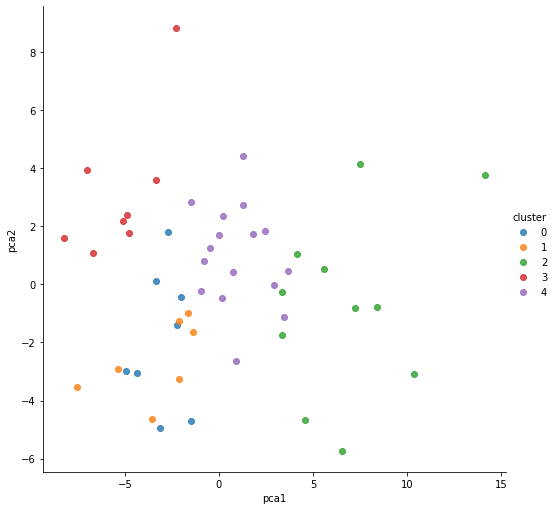

In [210]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False, height=7)
plt.show()

Obj. Func: 1443.2956349206347
Obj. Func: 1157.3216098484847
Obj. Func: 995.7564438502677
Obj. Func: 867.6542447552447
Obj. Func: 790.6511428571429
Obj. Func: 716.68075
Obj. Func: 604.4031684981686
Obj. Func: 541.6999523809525
Obj. Func: 486.7956103896105


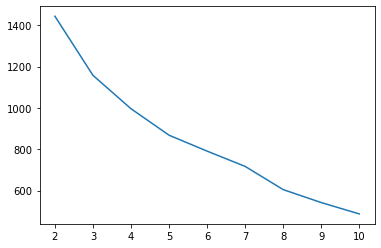

In [211]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(smallest2019.values)
    # sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

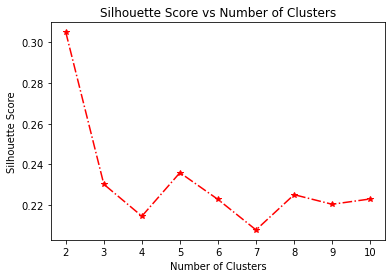

In [212]:
ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(smallest2019.values) for k in k_range]
sscores = [silhouette_score(smallest2019.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

In [213]:
clusterResults2019smallest.groupby(["cluster"]).Normalized_Death_Rate.std()

cluster
0    11.109719
1     8.425843
2     9.374414
3     7.821714
4          NaN
5     8.555769
Name: Normalized_Death_Rate, dtype: float64

In [187]:
clusterResults2019smallest = pd.concat([kmeans_3, smallest2019], axis=1, join='outer')
clusterResults2019smallest['Normalized_Death_Rate'] = normDR2019
clusterResults2019smallest['Num Deaths'] = numDeaths2019
clusterResults2019smallest['State'] = state_list
clusterResults2019smallest.groupby(["cluster", "State", "Num Deaths"]).mean()

pca1          pca2  Year  \
cluster State          Num Deaths                                     
0       Alabama        768.0      -1.372200e+06 -5.536305e+05  2019   
        Arizona        1907.0     -3.702881e+06 -1.972306e+05  2019   
        Indiana        1699.0      4.722864e+06 -2.728295e+05  2019   
        Kentucky       1380.0      1.894139e+05 -1.881462e+05  2019   
        Louisiana      1267.0     -2.818045e+06 -1.636270e+05  2019   
        Massachusetts  2210.0      5.501347e+06  4.003403e+05  2019   
        Missouri       1583.0      6.482035e+06 -1.701665e+05  2019   
        New Jersey     2805.0      8.048492e+06  4.290471e+05  2019   
        South Carolina 1127.0     -2.699907e+06 -8.616945e+04  2019   
        Tennessee      2089.0      1.069245e+07 -5.327578e+05  2019   
        Virginia       1547.0      1.773346e+06  7.272589e+04  2019   
        Washington     1259.0     -4.214358e+06 -2.086967e+05  2019   
        Wisconsin      1201.0     -2.440154e+06  3.325371e+04  2019   
1       Florida        5268.0      7.957131e+07 -3.448444e+05  2019   
        New York       3617.0      7.155407e+07  1.682156e+06  2019   
        Texas          3136.0      6.806359e+07 -6.202876e+05  2019   
2       Alaska         132.0      -2.779013e+07  1.133647e+05  2019   
        Delaware       435.0      -2.513272e+07  1.189209e+05  2019   
        Hawaii         242.0      -2.545878e+07  1.495604e+05  2019   
        Idaho          265.0      -2.265620e+07 -1.098415e+04  2019   
        Maine          371.0      -2.247421e+07  1.018846e+05  2019   
        Montana        143.0      -2.496240e+07  6.749926e+04  2019   
        Nebraska       161.0      -1.973125e+07  1.265141e+05  2019   
        Nevada         647.0      -1.958987e+07 -6.461762e+04  2019   
        New Hampshire  407.0      -2.345959e+07  1.291852e+05  2019   
        New Mexico     599.0      -2.181603e+07  5.792922e+04  2019   
        North Dakota   82.0       -2.560290e+07  1.526707e+05  2019   
        Rhode Island   307.0      -2.348453e+07  1.976417e+05  2019   
        South Dakota   86.0       -2.506658e+07  1.266853e+05  2019   
        Utah           571.0      -2.132733e+07 -6.537930e+04  2019   
        Vermont        133.0      -2.674357e+07  1.261986e+05  2019   
        Wyoming        79.0       -2.757458e+07  1.109297e+05  2019   
3       Georgia        1408.0      1.824702e+07 -4.771716e+05  2019   
        Illinois       2790.0      2.254467e+07  1.539333e+05  2019   
        Michigan       2385.0      2.150124e+07 -4.138664e+05  2019   
        North Carolina 2266.0      2.371758e+07 -4.531900e+05  2019   
        Ohio           4251.0      3.431415e+07  1.971081e+05  2019   
        Pennsylvania   4377.0      4.614490e+07  3.989516e+05  2019   
4       California     6198.0      1.096664e+08 -1.425295e+05  2019   
5       Arkansas       388.0      -1.151100e+07 -1.462669e+05  2019   
        Colorado       1079.0     -1.200201e+07 -1.582248e+05  2019   
        Connecticut    1214.0     -1.254713e+07  2.308911e+05  2019   
        Iowa           352.0      -1.258229e+07  1.734813e+05  2019   
        Kansas         403.0      -1.532459e+07 -3.360136e+04  2019   
        Maryland       2369.0     -9.814510e+06 -1.731096e+04  2019   
        Minnesota      792.0      -6.069951e+06  1.930045e+05  2019   
        Mississippi    394.0      -1.170333e+07  4.090915e+04  2019   
        Oklahoma       645.0      -1.150406e+07 -2.245717e+05  2019   
        Oregon         615.0      -1.207164e+07 -1.556032e+05  2019   
        West Virginia  870.0      -1.748616e+07  1.169177e+05  2019   

                                   Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
cluster State          Num Deaths                                      
0       Alabama        768.0            15575.0               9739.0   
        Arizona        1907.0           25876.0              16578.0   
        Indiana        1699.0           23218.0              1

# Discussion about Results

It seems that the total number of prescriptions written and given had the largest impact on predicting the number of deaths from an overdose at the state level. Using prescriptions as predictors organized the states by very large death rates, to very low death rates. Using the predictors from the United Health Foundation resulted in a high variance in a smaller amount of clusters in terms of the number of deaths. 

# Conclusions
It would seem that the amount of Opioid Prescriptions given out combined with the predictors does an OK job at predicting the number of deaths that will happen in a year.